今年2月的时候开始学习台大林轩田老师的机器学习课程，感觉很好，这里记录一下作业详解，一来加深自己的理解，而来也可以给需要的小伙伴参考下,话不多说，进入正题。(其实这部分的资料和我之前整理的Learning from data差不多，更全面的部分可以参考Learning from data的习题整理。）

我的github地址：  
https://github.com/Doraemonzzz

个人主页：  
http://doraemonzzz.com/

作业地址:  
https://www.csie.ntu.edu.tw/~htlin/course/ml15fall/

参考资料:  
https://blog.csdn.net/a1015553840/article/details/51085129  
http://www.vynguyen.net/category/study/machine-learning/page/6/  
http://book.caltech.edu/bookforum/index.php  
http://beader.me/mlnotebook/



#### Problem 1
(ii) Detecting potential fraud in credit card charges  
(iv) Determining the optimal cycle for traffic lights in a busy intersection  
(v) Determining the age at which a particular medical test is recommended

质数和自由落体问题可以直接得出结果，所以使用design approach

#### Problem 2
这题在Learning from data上也有，当时是选择所有满足的学习种类，这里选择最适合的，应该选择reinforcement learning，因为训练下棋的过程每一步都会给以回馈，下的好给正回馈，下的不好给负回馈，类似训练小狗。

#### Problem 3
对没有标签的书分类，unsupervised learning。

#### Problem 4
有脸的图片和没脸的图片都标记出来，supervised learning。

#### Problem 5
这题我认为是active learning，因为人为设计了实验，更具体的有关active learning，可以参考
https://www.cnblogs.com/maybe2030/p/5515042.html

#### Problem 6
由题设知$E_{OTS} (g, f)=\frac 1 L\sum_{m=1}^L[\![(N+m)被2整除]\!]$  
我们知道$1$到$N$中被2整除的正整数有$[\frac N 2]$个，$[]$为高斯函数，意思为向下取整
因此
$$
E_{OTS} (g, f)=\frac1 L[(1到N+L中被2整除的数的个数)-(1到N中被2整除的数的个数)]
=\frac1 L([\frac {N+L}2]-[\frac {N}2])
$$

#### Problem 7
这题的意思是在训练集$D$上没有误差，在$\{x_{N+1} , . . . , x_{N+L}\}$上的取值就任意了，每个点有两种取值，所以一共有$2^L$种可以拟合的$f$

#### Problem 8
题目的假设意思应该是每个在训练集无噪声的$f$出现的概率是一样的，所以这些$f$在测试集上每个点出现错误的概率应该是一样的，$E_{OTS}(g,f)=\frac k L$相当于在$L$个点中挑$k$个，因此
$$
P(E_{OTS}(g,f)=\frac k L)=\frac {C_L^k} {2^L}
$$
$$
\begin{aligned}
E_f[E_{OTS} (g, f)]&=\sum_{k=0}^L\frac k L \frac {C_L^k}{2^L}
\\&=\frac {\sum_{k=0}^LkC_L^k}{L2^L}
\\&=\frac {\sum_{k=1}^L LC_{L-1}^{k-1}}{L2^L}
\\&=\frac {2^{L-1}}{2^L}
\\&=\frac 1 2
\end{aligned}
$$
注意这里用到了$kC_n^k=nC_{n-1}^{k-1}$

所以
$$
E_f[E_{OTS} (A_1(D), f)]=E_f[E_{OTS} (A_2(D), f)]
$$

#### Problem 9
$P=C_{10}^5(\frac 1 2)^{10}\approx0.24609375$

In [1]:
from scipy.special import comb
print(comb(10,5)/2**10)

0.24609375


#### Problem 10
$P=C_{10}^9{(\frac 9{10})^{9}\frac 1 {10} }\approx0.387420489 $

In [2]:
print(comb(10,9)*((0.9)**9)*0.1)

0.387420489


#### Problem 11
$P=C_{10}^1{(\frac 9{10})^{1}{(\frac 1 {10})}^{9} }+C_{10}^0{{(\frac 1 {10})}^{10} }\approx 9\times 10^{-9}$

In [3]:
print(comb(10,1)*((0.9)**1)*(0.1**9)+comb(10,0)*(0.1**10))

9.1e-09


#### Problem 12
回顾下$Hoeffding$不等式:
$$
P[| \mu-v|>\epsilon]\le 2e^{-2\epsilon ^2N}
$$
因此
$$
P[v\le 0.1]=P[0.9-v\ge 0.8]=P[\mu-v\ge 0.8]\le P[|\mu-v|\ge 0.8]\le 2e^{-2\times 0.8^2\times 10}\approx5.5215451440744015\times 10^{-6}
$$

#### Problem 13
这题以及下面一题一定要注意这两句话：They are just used to bind the six faces together. The probability below only refers to drawing from the bag.

所以考虑的时候只要看骰子属于哪个包即可。
全是orange 1，所以骰子属于B或者C，因此$P=(\frac 1 2)^5=\frac 1 {32}$

#### Problem 14
这题要计算某个数字全为orange的概率，取出为全orange 1的情况为从B,C中取出,取出为全orange 2的情况为从A,C中取出，取出为全orange 3的情况为从B,C中取出，取出为全orange 4的情况为从A,D中取出，取出为全orange 5的情况为从B,D中取出，取出为全orange 6的情况为从A,D中取出。所以一共有4中情形(A,C),(B,C),(A,D),(B,D),注意全A,B,C,D的情形都被算了两次，所以一共有$4\times2^5-4=92$种情形，概率为$P=\frac {92}{4^5}=\frac {31}{256}$

#### Problem 15
这题是使用最标准的PLA，下面编程实现下

In [88]:
import numpy as np

file=open('data.txt')
data=[]

#增加w0
for i in file.readlines():
    #增加w0
    temp1='1 '+i.replace('\t',' ').replace('\n','')
    #分隔数据
    temp2=temp1.split(' ')
    #转化为float
    temp3=np.array(list(map(float,temp2)))
    #转化为np.array存入数据
    data.append(temp3)

#维度
n=len(data[0])-1
#数据组数
m=len(data)

#定义sign函数
def sign(x):
    if x>0:
        return 1
    else:
        return -1

#定义判别函数，判断所有数据是否分类完成,n为数据维度
def Judge(x,w,n):
    flag=1
    for i in x:
        if sign(i[:n].dot(w))*i[-1]<0:
            flag=0
            break
    return flag

#定义PLA,n为数据维度,m为数据数量,k为步长
def PLA(x,k,n,m):
    #初始化向量
    w=np.zeros(n)
    #记录最后一个更新的向量
    last=0
    #记录次数
    t=0
    if Judge(x,w,n):
        pass
    else:
        #记录取哪个元素
        j=0
        while Judge(x,w,n)==0:
            i=x[j]
            #print(i[:n],i[-1])
            if sign(i[:n].dot(w))*i[-1]<0:
                w+=k*i[-1]*i[:n]
                t+=1
                last=j
            j+=1
            if(j>=m):
                j=j%m
    return t,last,w
PLA(data,1,n,m)

(45, 135, array([-3.       ,  3.0841436, -1.583081 ,  2.391305 ,  4.5287635]))

所以这题答案为更新了45次，最后一个更新的元素索引为136(python中从0开始数)

#### Problem 15

打乱之后运行2000次，作出直方图

In [92]:
import random
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

x=[]
for i in range(2000):
    random.shuffle(data)
    x.append(PLA(data,1,n,m)[0])

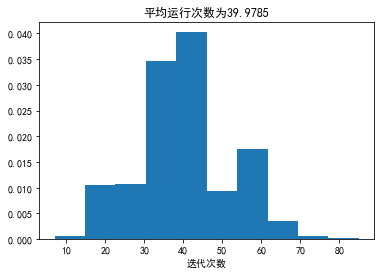

In [96]:
plt.hist(x,normed=True)
plt.xlabel("迭代次数")
plt.title("平均运行次数为"+str(sum(x)/2000))
plt.show()

#### Problem 16
这里修改系数$\eta=0.5$,打乱之后运行2000次，作出直方图

In [93]:
x1=[]
for i in range(2000):
    random.shuffle(data)
    x1.append(PLA(data,0.5,n,m)[0])

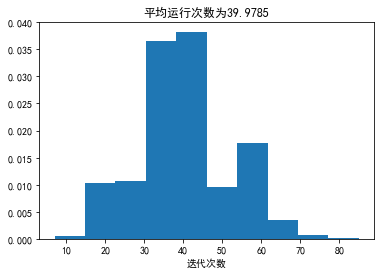

In [97]:
plt.hist(x1,normed=True)
plt.xlabel("迭代次数")
plt.title("平均运行次数为"+str(sum(x)/2000))
plt.show()

#### Problem 17
Pocket PLA的问题，最多更新50次，打乱数据，运行2000遍，计算错误率

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

#数据读取
filetrain=open('hw1_18_train.txt')
filetest=open('hw1_18_test.txt')

trian=[]

#数据处理
def processdata(file):
    data=[]
    for i in file.readlines():
        #增加w0
        temp1='1 '+i.replace('\t',' ').replace('\n','')
        #分隔数据
        temp2=temp1.split(' ')
        #转化为float
        temp3=np.array(list(map(float,temp2)))
        #转化为np.array存入数据
        data.append(temp3)
    return data
    
train=processdata(filetrain)
test=processdata(filetest)

#维度
n=len(train[0])-1
#训练数据组数
m=len(train)
#测试数据组数
m1=len(test)

#定义sign函数
def sign(x):
    if x>0:
        return 1
    else:
        return -1

#定义计算错误个数的函数,n为数据维度
def CountError(x,w,n):
    count=0
    for i in x:
        if sign(i[:n].dot(w))*i[-1]<0:
            count+=1
    return count


#定义PocketPLA,n为数据维度,m为数据数量,k为步长,max为最大更新次数
def PocketPLA(x,k,n,m,maxnum):
    #初始化向量
    w=np.zeros(n)
    #错误率最小的向量
    w0=np.zeros(n)
    #记录次数
    t=0
    error=CountError(x,w,n)
    if error==0:
        pass
    else:
        #记录取哪个元素
        j=0
        while (t<maxnum or error==0):
            i=x[j]
            #print(error)
            if sign(i[:n].dot(w))*i[-1]<0:
                w+=k*i[-1]*i[:n]
                t+=1
            error1=CountError(x,w,n)
            if error>error1:
                w0=w[:]
                error=error1
            j+=1
            if(j>=m):
                j=j%m
    return w0,error

In [3]:
import random

x=[]

for i in range(2000):
    random.shuffle(train)
    error=PocketPLA(train,1,n,m,50)[1]
    x.append(error/m1)

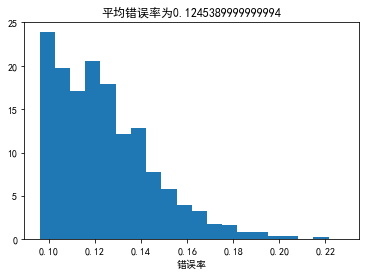

In [4]:
plt.hist(x,20,normed=True)
plt.xlabel("错误率")
plt.title("平均错误率为"+str(sum(x)/2000))
plt.show()

#### Problem 19
这题只使用普通的的PLA

In [155]:
#定义PLA,n为数据维度,m为数据数量,k为步长,max为最大更新次数
def PLA(x,k,n,m,maxnum):
    #初始化向量
    w=np.zeros(n)
    #记录次数
    t=0
    error=CountError(x,w,n)
    if error==0:
        pass
    else:
        #记录取哪个元素
        j=0
        while (t<maxnum or error==0):
            i=x[j]
            if sign(i[:n].dot(w))*i[-1]<0:
                w+=k*i[-1]*i[:n]
                t+=1
            j+=1
            if(j>=m):
                j=j%m
    return w,CountError(x,w,n)

In [146]:
import random

x1=[]

for i in range(2000):
    random.shuffle(train)
    error=PLA(train,1,n,m,50)[1]
    x1.append(error/m1)

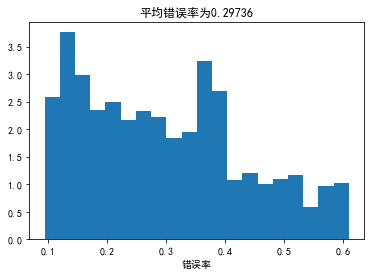

In [163]:
plt.hist(x1,20,normed=True)
plt.xlabel("错误率")
plt.title("平均错误率为"+str(sum(x1)/2000))
plt.show()

#### Problem 20

In [164]:
import random

x2=[]

for i in range(2000):
    random.shuffle(train)
    error=PocketPLA(train,1,n,m,100)[1]
    x2.append(error/m1)

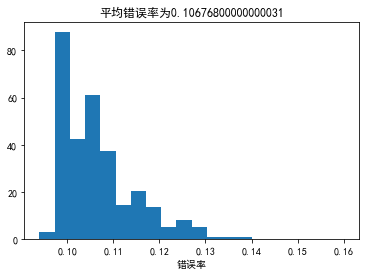

In [166]:
plt.hist(x2,20,normed=True)
plt.xlabel("错误率")
plt.title("平均错误率为"+str(sum(x2)/2000))
plt.show()

#### Problem 21
回顾下结论，$ R^2 = {max}_{1\le n\le N} ||xn ||^2$,$\rho = {min}_{1\le n\le N} \frac {y_n(w^{*T} x_n )} {||x_n||}$，那么运行时间$t\le \frac {R^2} {\rho^2}$，题目的意思是问如果所有的$||x_n||$缩短20倍，那么$t$是否也会缩短20倍？  
答案是否,由更新规则知$w$是$x_n$的线性组合($w_0=0时$)，所以如果所有$||x_n||$缩短20倍，那么$||w||$也会缩短20倍，那么$\rho$缩短20倍，然后$R$缩短20倍，所以$\frac {R^2} {\rho^2}$不变，所以时间上界不会改变。